 # Import Necessary Libraries

## Let us import necessary libraries to get started!

In [1]:
pwd

'/home/wsuser/work'

In [2]:
!pip install keras
!pip install tensorflow

     |████████████████████████████████| 1.3 MB 22.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 29.9 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 9.9 MB/s  eta 0:00:01
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.35.0
    Uninstalling grpcio-1.35.0:
      Successfully uninstalled grpcio-1.35.0
  Attempting uninstall: opt-einsum
    Found existing installation: opt-einsum 3.1.0
    Uninstalling opt-einsum-3.1.0:
      Successfully uninstalled opt-einsum-3.1.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 20210226132247
    Uninstalling flatbuffers-20210226132247:
      Successfully uninstalled flatbuffers-20210226132247


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

## Import ImageDataGenerator library 

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Configure the ImageDataGenerator class

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_3bd6465db5984cd7ace9c3875376dba2 = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_3bd6465db5984cd7ace9c3875376dba2 = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_3bd6465db5984cd7ace9c3875376dba2 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ofefhP_HiEECGKMwVPTqBtOVhNgX_BysZmPpn_QA8_v5',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_3bd6465db5984cd7ace9c3875376dba2)

streaming_body_9 = client_3bd6465db5984cd7ace9c3875376dba2.get_object(Bucket='pneumoniaprediction-donotdelete-pr-puski2ezbqmneh', Key='dataset.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [7]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_9.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

## Apply ImageDataGenerator functionality to Train and Test data

In [8]:
pwd

'/home/wsuser/work'

In [9]:
import os
filenames = os.listdir('/home/wsuser/work/dataset/train')

In [10]:
x_train=train_datagen.flow_from_directory("/home/wsuser/work/dataset/train",target_size=(64,64),batch_size=32,class_mode="binary")
x_test=test_datagen.flow_from_directory("/home/wsuser/work/dataset/test",target_size=(64,64),batch_size=32,class_mode="binary")

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
print(x_train.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


# Model Building

## Initialize the model

In [12]:
model=Sequential()

## Add first Convolution layer

In [13]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

## Add second Convolution layer

In [14]:
model.add(Convolution2D(32,(3,3), activation="relu"))

## Add Pooling layer

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

## Add Flatten layer

In [16]:
model.add(Flatten())

## Add hidden layer

In [17]:
model.add(Dense(units=128,activation="relu"))

## Add Output layer

In [18]:
model.add(Dense(units=1,activation="sigmoid"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3686528   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 3,696,801
Trainable params: 3,696,801
Non-trainable params: 0
______________________________________________

## Compile the model

In [20]:
model.compile(loss="binary_crossentropy", optimizer="Adam",metrics=["accuracy"])

## Fit the model to the data

In [21]:
model.fit(x_train,steps_per_epoch=16,epochs=20,validation_data=x_test,validation_steps=20)

Epoch 1/20
16/16 [==============================] - 15s 923ms/step - loss: 0.7639 - accuracy: 0.6539 - val_loss: 0.5892 - val_accuracy: 0.7196
Epoch 2/20
16/16 [==============================] - 14s 879ms/step - loss: 0.5030 - accuracy: 0.7647 - val_loss: 0.4868 - val_accuracy: 0.7356
Epoch 3/20
16/16 [==============================] - 13s 831ms/step - loss: 0.3512 - accuracy: 0.8513 - val_loss: 0.3598 - val_accuracy: 0.8365
Epoch 4/20
16/16 [==============================] - 13s 856ms/step - loss: 0.3217 - accuracy: 0.8593 - val_loss: 0.4977 - val_accuracy: 0.7676
Epoch 5/20
16/16 [==============================] - 14s 879ms/step - loss: 0.3096 - accuracy: 0.8738 - val_loss: 0.3834 - val_accuracy: 0.8141
Epoch 6/20
16/16 [==============================] - 13s 860ms/step - loss: 0.2411 - accuracy: 0.9172 - val_loss: 0.5178 - val_accuracy: 0.7580
Epoch 7/20
16/16 [==============================] - 14s 890ms/step - loss: 0.2576 - accuracy: 0.9017 - val_loss: 0.3576 - val_accuracy: 0.8285

In [22]:
#steps_per_epoch=no_of_images_in_train_data/batch_size = 5216/32= 163
#Validation_steps=no_of_images_in_test_data/batch_size = 624/32 =20

## Save the model

In [23]:
model.save("pneumonia.h5")

In [24]:
!tar -zcvf pneumonia-prediction-model_new.tgz pneumonia.h5

pneumonia.h5


In [25]:
ls -1

dataset/
pneumonia.h5
pneumonia-prediction-model_new.tgz


In [26]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 26.4 MB/s eta 0:00:01


In [27]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                   "url":"https://eu-gb.ml.cloud.ibm.com",
                    "apikey":"NgasXUmNsLTRoZRUlURCmPSR2TyZdg3Totg4ubgPKfPB"
                 }
client = APIClient(wml_credentials)

In [28]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [29]:
space_uid = guid_from_space_name(client, 'Pneumonia_Prediction')
print("Space UID =  " +space_uid)

Space UID =  e6332e4a-d9ce-40cf-a0f5-b7e458745187


In [30]:
client.set.default_space(space_uid)

'SUCCESS'

In [31]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [32]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_1.15-py3.6")
software_spec_uid

'2b73a275-7cbf-420b-a912-eae7f436e0bc'

In [33]:
model_details = client.repository.store_model(model='pneumonia-prediction-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:"Keras_2.2.4",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                             )
model_id = client.repository.get_model_uid(model_details)

Note: Warnings!! :  Model type keras_2.2.4 is deprecated. We recommend you use a supported model type. See Supported Frameworks https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [34]:
model_id

'bb655c7c-866e-4a5a-9602-5f5f05f50e14'

In [35]:
client.repository.download(model_id,'my_model.tar.gz')

Successfully saved model content to file: 'my_model.tar.gz'


'/home/wsuser/work/my_model.tar.gz'

## Import the necessary libraries

In [36]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [37]:
model=load_model("pneumonia.h5")


In [38]:

streaming_body_11 = client_3bd6465db5984cd7ace9c3875376dba2.get_object(Bucket='pneumoniaprediction-donotdelete-pr-puski2ezbqmneh', Key='person1946_bacteria_4875.jpeg')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [39]:

streaming_body_12 = client_3bd6465db5984cd7ace9c3875376dba2.get_object(Bucket='pneumoniaprediction-donotdelete-pr-puski2ezbqmneh', Key='NORMAL2-IM-1436-0001.jpeg')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
if not hasattr (streaming_body_12, "__iter__"): streaming_body_12.__iter__ = types.MethodType(__iter__, streaming_body_12)

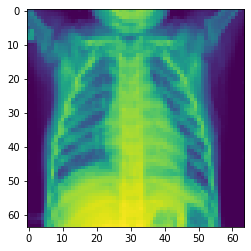

In [40]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img1 = Image.open(streaming_body_12)
newsize = (64, 64)
img = img1.resize(newsize)
im_array = np.asarray(img)

plt.imshow(im_array)
plt.show()